<center><h1>BUSS6002 - Data Science in Business</h1></center>

#### Pre-Tutorial Checklist

1. Complete Tasks 1 and 3 from Week 3
2. Attempt Week 4 tutorial up to AND including Exercise 1
3. Obtain an API key from https://openweathermap.org/appid#get
4. Obtain an API key from Quandl by creating an account https://www.quandl.com/


# Tutorial 4 - Data Handling, Accessing APIs and Visualisation

Start by importing ``pandas`` and loading our marketing dataset

In [1]:
import pandas as pd

marketing = pd.read_csv('DirectMarketing.csv')

# Remember this dataset?
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


# Aggregating Data

The Pandas ``groupby`` feature is similar to the concept of pivot tables in Excel and performs exactly the same as ``group by`` in many database query languages.

It gathers the data into groups based on unique categories in a column of a dataframe.  We do this when we have different groups in our data that we would like to summarize seperately.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame.groupby</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

<img width=900 src="img/groupby.png">

## Example

Let's take a look at an example on the marketing data by grouping based on number of Catalogs. 

In [2]:
# This is our original dataset
marketing.head(n = 10)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
5,Young,Male,Own,Married,Close,30400,0,Low,6,495
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,782
7,Middle,Male,Own,Single,Close,68400,0,High,18,1155
8,Middle,Female,Own,Married,Close,51900,3,Low,6,158
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034


We can group our dataset by some categorical variables (or just attributes that do not have a lot of unique items) using the groupby:

In [4]:
catalog_groups = marketing.groupby('Catalogs')
catalog_groups.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
5,Young,Male,Own,Married,Close,30400,0,Low,6,495
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,782
7,Middle,Male,Own,Single,Close,68400,0,High,18,1155
8,Middle,Female,Own,Married,Close,51900,3,Low,6,158
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034


So far it looks the same! The only difference is more rows. This is because by default the ``head`` function returns the first 5 rows in each group.

It turns out that to make use of ``groupby`` we need to apply some summary operations to it. By summary, I mean something describing the data, like finding the sum, mean, median, maximum, minimum, etc. Let's apply the sum operation to the grouped dataset:

In [5]:
catalog_groups.sum()['AmountSpent']

Catalogs
6     155402
12    287035
18    348462
24    425871
Name: AmountSpent, dtype: int64

We obtain the total amount spent for each group! Using the ``type`` function we can see that the grouped dataset is stored in a pandas DataFrameGroupBy object (slightly different to the DataFrame object we're used to)

In [6]:
type(catalog_groups)

pandas.core.groupby.groupby.DataFrameGroupBy

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - groupby.DataFrameGroupBy</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

We can use the ``groups`` method to return a python dictionary ``dict`` object where group names become dictionary keys. You can see all the row indices corresponding to each group (it's a little hard to read!)

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - GroupBy.groups</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.groups.html

In [7]:
print(catalog_groups.groups)

{6: Int64Index([  0,   1,   5,   8,  20,  24,  26,  35,  46,  50,
            ...
            958, 962, 970, 972, 974, 978, 980, 982, 992, 994],
           dtype='int64', length=252), 12: Int64Index([  4,   6,  10,  13,  15,  19,  21,  23,  28,  30,
            ...
            945, 948, 950, 954, 963, 964, 965, 966, 971, 975],
           dtype='int64', length=282), 18: Int64Index([  2,   3,   7,   9,  11,  17,  18,  22,  25,  27,
            ...
            968, 973, 979, 985, 989, 990, 991, 995, 996, 998],
           dtype='int64', length=233), 24: Int64Index([ 12,  14,  16,  32,  33,  36,  39,  41,  42,  49,
            ...
            977, 981, 983, 984, 986, 987, 988, 993, 997, 999],
           dtype='int64', length=233)}


To make it a bit easier to read we can use the ``keys`` method from the ``dict`` class, which returns the group indices.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - dict.keys</h3></div>
https://docs.python.org/3/library/stdtypes.html#dict.keys

In [7]:
print(catalog_groups.groups.keys())

dict_keys([6, 12, 18, 24])


So the effect of the groupby operation only becomes apparent when you start summarizing data. Let's see some more examples:

In [8]:
# Find the mean of the whole dataset
marketing.mean()

Salary         56103.900
Children           0.934
Catalogs          14.682
AmountSpent     1216.770
dtype: float64

In [9]:
# Find the mean of the grouped dataset
catalog_groups.mean()

,Salary,Children,AmountSpent
Catalogs,,,
6,46892.063492,1.134921,616.674603
12,55686.170213,0.936170,1017.854610
18,60408.154506,0.841202,1495.545064
24,62268.240343,0.806867,1827.772532


Notice the difference! This time it finds the mean separately for each Catalog group

<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 1 - Summary Statistics and Groups</h3></div>

1. Try to calculate the mean of the means for each column of the grouped dataset.
2. Why are they different to the mean of the entire dataset?

# Merging Data

We merge when we have two different datasets stored in two different DataFrames (two different places), and we want to combine them together somehow.

If you have two datasets with some overlapping information then you might want to join them into a single dataframe for future processing.

You can use the pandas ``merge`` function to take care of this. The only requirement is that in each dataset you have a column of data that is the same and unique for each row.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame.merge</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

<img width=900 src="img/merge.png">

## Example

Let's just record people's lunch as a DataFrame

In [10]:
lunch = pd.DataFrame({'People': ['Kelvin', 'Haonan', 'Daniel'], 'Lunch': ['Sushi', 'Cheeseburger', 'Pizza']})
lunch

,People,Lunch
0,Kelvin,Sushi
1,Haonan,Cheeseburger
2,Daniel,Pizza


Now, let's record people's dinner

In [11]:
dinner = pd.DataFrame({'People': ['Kelvin', 'Haonan', 'Annabelle'], 'Dinner': ['Ramen', 'Salad', 'Thai']})
dinner

,People,Dinner
0,Kelvin,Ramen
1,Haonan,Salad
2,Annabelle,Thai


Let's merge these two datasets together. We want to keep all the data points (union) we have by setting how='outer' in the optional keywords

How do we find out what keyword arguments to change? Use the documentation! I always google 'LIBRARY_NAME OBJECT_NAME METHOD_NAME'. For example, here I google 'pandas DataFrame merge'. Notice how there are missing data now.

In [12]:
food = lunch.merge(dinner, how='outer')
food

,People,Lunch,Dinner
0,Kelvin,Sushi,Ramen
1,Haonan,Cheeseburger,Salad
2,Daniel,Pizza,NaN
3,Annabelle,NaN,Thai


We can reorder our dataset using indexing as well (last week's concepts)

In [13]:
food[['People', 'Lunch', 'Dinner']]

,People,Lunch,Dinner
0,Kelvin,Sushi,Ramen
1,Haonan,Cheeseburger,Salad
2,Daniel,Pizza,NaN
3,Annabelle,NaN,Thai


<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 2 - Merging</h3></div>

The code below executes an *inner* join and returns fewer rows. Which rows have been dropped and why?

In [14]:
food = lunch.merge(dinner)
food

,People,Lunch,Dinner
0,Kelvin,Sushi,Ramen
1,Haonan,Cheeseburger,Salad


# Application Programming Interfaces (APIs)

Application Program Interfaces, or APIs, are tools that allow us to access data from remote servers. Sites like Twitter, Facebook and Spotify all have API's that make some of their data accessible. This is useful in cases where the database may be rapidly changing, such as with stocks, or when we only need a portion of a very large database.

APIs also allow programs and apps to access live data and services without storing a copy of the database. For example, the Uber app makes use of the Google Maps API for geographical data, and the Braintree API for online payments services.

APIs can be accessed in two different ways in Python: through URL requests and through pre-built Python libraries. Here we will learn both. As a layer of added security, many API's require the use of unique keys (a pseudorandom string of characters) which are specific to a user or app. For this demonstration we will provide the API keys but you are encouraged to obtain your own since many API keys have a request limit.

# Accessing API's via HTTP Request

Many API's can be accessed through a simple URL call where the query parameters are embedded in the URL. You may have noticed that your search terms in Google appear in the URL of the results page. This is because the Google search engine works in the exact same way.

<img width=900 src="img/api.png">

Here we will use the OpenWeatherMaps API to get live weather data from anywhere in the world. You can obtain an API key by signing up at https://openweathermap.org/api. The code below generates an OpenWeatherMaps API query.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - OpenWeatherMap</h3></div>
https://openweathermap.org/current

In [10]:
# Specify the apiKey
api_key = '491a9ec8e8da3febdea1b7e83c2e9ed3'

# Build the query URL
base_url = "http://api.openweathermap.org/data/2.5/weather?" 
city_name = input("Enter city name : ") 
url = base_url + "appid=" + api_key + "&q=" + city_name

print(url)

Enter city name : Sydney
http://api.openweathermap.org/data/2.5/weather?appid=491a9ec8e8da3febdea1b7e83c2e9ed3&q=Sydney


Clicking on the link should open a page of weather data encoded in a familiar format: ``json``. To use this data, we can make a URL request in Python and unpack the ``json`` file.

To do this we will use the `` .get()`` function from the Requests Python library. You can install Requests by typing

``conda install requests``

into Terminal on Mac OSX or into Anaconda prompt in Windows. This will allow us to call data from a URL in python.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - requests</h3></div>
http://docs.python-requests.org/en/master/

In [11]:
import requests, json

response = requests.get(url)
x = response.json() 

print(x)

{'coord': {'lon': 151.22, 'lat': -33.85}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 298.92, 'pressure': 1015, 'humidity': 69, 'temp_min': 297.59, 'temp_max': 300.37}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1553229951, 'sys': {'type': 1, 'id': 9600, 'message': 0.005, 'country': 'AU', 'sunrise': 1553198350, 'sunset': 1553241916}, 'id': 2147714, 'name': 'Sydney', 'cod': 200}


Now x contains a series of nested dictionaries and lists containing weather information.

An important thing to note is the 'cod' code at the very end. This tells you the HTTP status code for the request, so if your request fails you can have some idea why. The most common ones are ``200``, which means the request encountered no errors, and ``404`` which indicates that no results were found. An index of HTTP status codes can be found on [Wikipedia](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes).

We can go a step further and print out some of the data:

In [12]:
temperature = x["main"]["temp"]    
pressure = x["main"]["pressure"]   
humidiy = x["main"]["humidity"]   
description = x["weather"][0]["description"] 
  
# pretty print the response 
print(" Temperature (in kelvin) = " +
                str(temperature) + 
      "\n atmospheric pressure (in hPa) = " +
                str(pressure) +
      "\n humidity (percent) = " +
                str(humidiy) +
      "\n description = " +
                str(description))

 Temperature (in kelvin) = 298.92
 atmospheric pressure (in hPa) = 1015
 humidity (percent) = 69
 description = scattered clouds


<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 3 - API calls</h3></div>

By looking at the documentation for the OpenWeatherMap API, are you able to construct a URL that will tell you the name of the town at latitude 34 and longitude -118?

# Accessing API's via a Python Library

Quandl is a public database containing historical financial and economic data as well as other information relevant to investors. The database is sourced from over 500 publishers and is made freely accessible through an API. You can obtain a Quandl API key by signing up at https://www.quandl.com/ and navigating to account settings.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - Quandl</h3></div>
https://docs.quandl.com/docs/python-time-series

We can the quandl Python library's own ``.get()`` function to obtain time-series stock data for a chosen company as a pandas DataFrame. Quandl uses a system of codes to identify stock datasets. The codes are formatted as ``Database/Ticker``. We will use the public ``WIKI`` database and the ticker for facebook stock, ``FB``.

In [13]:
import quandl

api_key = 'QV43tMteJEMB4s1__FbP'

fb_data = quandl.get("WIKI/FB", trim_start = "2017-12-12", trim_end = "2018-12-30", authtoken=api_key)

fb_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-12,178.60,179.1800,176.60,176.96,16675275.0,0.0,1.0,178.60,179.1800,176.60,176.96,16675275.0
2017-12-13,177.30,179.1600,177.25,178.30,14406776.0,0.0,1.0,177.30,179.1600,177.25,178.30,14406776.0
2017-12-14,178.29,180.3601,177.68,178.39,13393757.0,0.0,1.0,178.29,180.3601,177.68,178.39,13393757.0
2017-12-15,179.02,180.4934,178.36,180.18,26225100.0,0.0,1.0,179.02,180.4934,178.36,180.18,26225100.0
2017-12-18,181.01,181.3000,179.75,180.82,17014337.0,0.0,1.0,181.01,181.3000,179.75,180.82,17014337.0


<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 4 - API queries</h3></div>

Show the closing prices of Twitter shares from the 1st of January to the 30th of December 2018 as a line plot. The Twitter ticker is ``TWTR``.

# Visualisation: Bar Charts

Bar charts are a useful way of visualising and comparing data for multiple discrete categories. The data can also be clustered in various ways, such as grouping and stacking, in order to show more than one measured variable.

The following code generates a DataFrame containing demographic data from a town. The data shows the total male and female population for three age brackets.

In [19]:
data = {'Age': ['Young','Middle','Old'],
        'Male': [1783,2289,1032],
        'Female': [1950,2320,1491],
        'Total': [3733,4609,2523]
        }

df = pd.DataFrame(data,columns= ['Age', 'Male', 'Female','Total'])

df.head()

,Age,Male,Female,Total
0,Young,1783,1950,3733
1,Middle,2289,2320,4609
2,Old,1032,1491,2523


We can create a bar chart using the matplotlib ``.bar()`` function to visualise the total population in each age group

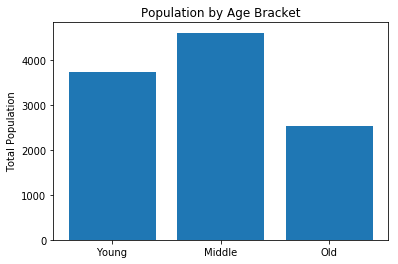

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# extract values from the dataframe and create an array of category indices, x_pos
total = df['Total'].values
x_pos = np.arange(len(total))

# create the bar chart
plt.bar(x_pos, total, align='center')

# use .xticks() to replace x_pos indices with category names
plt.xticks(x_pos, ('Young', 'Middle', 'Old'))

# add labels and title
plt.ylabel('Total Population')
plt.title('Population by Age Bracket')
 
plt.show()

We can make this chart slightly more interesting by comparing male and female populations in each age group.  One way of achieving this is to stack bars vertically on one another.

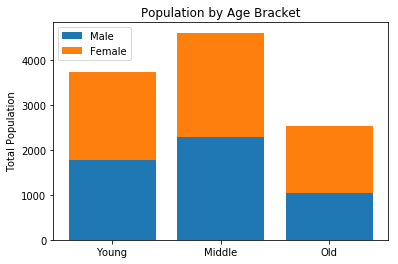

In [22]:
# We call .bar() on both sets of data. On the second call we must also specify the bottom dataset
plt.bar(x_pos, df['Male'].values)
plt.bar(x_pos, df['Female'].values, bottom=df['Male'].values)

# again we add labels and title
plt.xticks(x_pos, ('Young', 'Middle', 'Old'))
plt.ylabel('Total Population')
plt.title('Population by Age Bracket')

# we add a colour map
Gender=['Male','Female']
plt.legend(Gender,loc=2)

plt.show()

Another way of achieving a similar effect is by grouping bars together. We will do this by specifying a separation width and staggering the x_pos values of the second dataset by exactly one width. Instead of using ``.bar()`` we will use the ``.barh()`` function, which works in much the same way but plots horizontal bars instead of vertical ones.

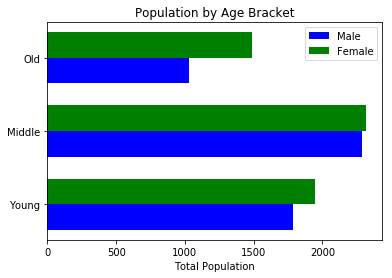

In [22]:
bar_width = 0.35

plt.barh(x_pos,df['Male'].values, bar_width, color='blue')
plt.barh(x_pos+bar_width,df['Female'].values, bar_width, color='green')

# again we add labels and title
# notice that xticks is now yticks and ylabel is now xlabel
plt.yticks(x_pos+(bar_width/2), ('Young', 'Middle', 'Old'))
plt.xlabel('Total Population')
plt.title('Population by Age Bracket')

# we add a colour map
Gender=['Male','Female']
plt.legend(Gender,loc=1)
plt.show()

Note that it's also possible to generate basic bar plots directly within pandas, as in the snippet of code below:

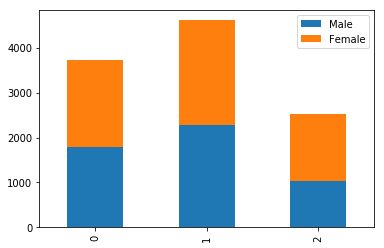

In [23]:
del df['Total']

df.plot(kind='bar', stacked=True)
plt.show()